
ESC20-1 Week1
2015122022 김윤환



Week1 LAB: Bayesian Belief Update


In [0]:
import numpy as np
np.set_printoptions(precision=3)
import pandas as pd
pd.set_option('display.precision', 3)
import matplotlib.pyplot as plt

Case1: Beta-Bonimal (unknown p)

In [0]:
from scipy.stats import binom, beta

In [3]:
# population parameter
p = 0.3
# generate toy sample
N = 15
np.random.seed(101)
data = binom.rvs(1,p, size=N)
print(data)
print(data.size)
print(data.sum())

[0 0 0 0 0 1 0 1 1 0 0 0 0 1 1]
15
5


prior belief

Text(0, 0.5, 'p(theta)')

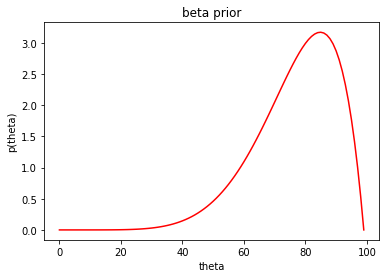

In [4]:
# choose your belief parameter
a= 7; b= 2

prior = beta(a, b)
theta = np.linspace(0,1,100)
plt.plot(prior.pdf(theta), color='r')
plt.title('beta prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Text(0, 0.5, 'p(theta)')

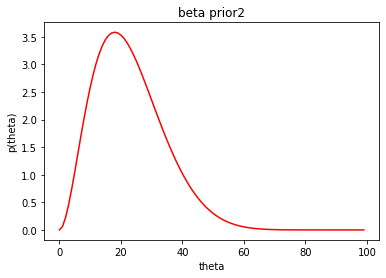

In [5]:
# you can always reflect other belief by tweaking your parameter;
a2= 3; b2= 10

prior2 = beta(a2, b2)
theta = np.linspace(0,1,100)
plt.plot(prior2.pdf(theta), color='r')
plt.title('beta prior2')
plt.xlabel('theta')
plt.ylabel('p(theta)')

Likelihood (Sampling Density)

(0.0, 0.0005)

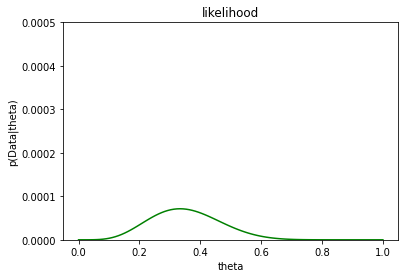

In [6]:
# scipy stats package does not allow for plotting pdf-theta so we need to define formula directly.
def likelihood(D, p):
    N = D.size; suc = D.sum()
    theta = np.linspace(0,1,100)
    return p**suc * (1-p)**(N-suc) # note that we neglected the constant as it will be canceled out in appling Bayes Rule

plt.plot(theta, likelihood(data, theta), color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")
plt.ylim(0,0.0005)

Posterior: Updated Belief


Text(0, 0.5, 'p(theta)')

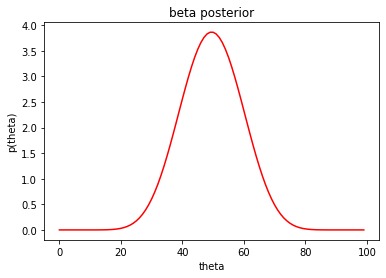

In [7]:
# Belief update
a_pos = a + data.sum()
b_pos = b + data.size - data.sum()

posterior = beta(a_pos, b_pos)
theta = np.linspace(0,1,100)
plt.plot(posterior.pdf(theta), color='r')
plt.title('beta posterior')
plt.xlabel('theta')
plt.ylabel('p(theta)')

(0.0, 4.0)

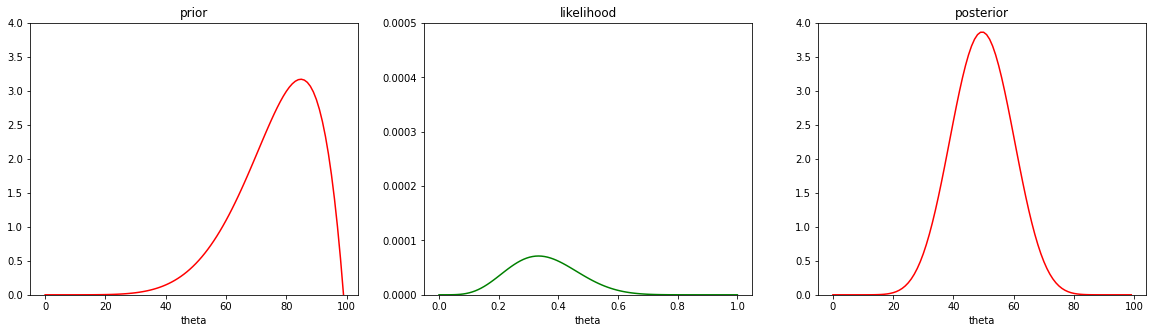

In [8]:
# in a nutshell;
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(131)
ax1.plot(prior.pdf(theta), color='r')
ax1.set_title('prior')
ax1.set_xlabel('theta')
ax1.set_ylim(0,4)

ax2 = fig.add_subplot(132)
ax2.plot(theta, likelihood(data, theta), color='g')
ax2.set_title('likelihood')
ax2.set_xlabel('theta')
ax2.set_ylim(0,0.0005)

ax3 = fig.add_subplot(133)
ax3.plot(posterior.pdf(theta), color='r')
ax3.set_title('posterior')
ax3.set_xlabel('theta')
ax3.set_ylim(0,4)

(HW) Case 2: Gamma-Gaussian (unknown mu)


In [0]:
import scipy as sp
import scipy.stats
from scipy.stats import norm

In [10]:
rv = sp.stats.norm(loc=1, scale=2)


N = 100
np.random.seed(100)
data = rv.rvs(size=N)
print(data)
print(data.size)
#print(data.sum())

[-2.5    1.685  3.306  0.495  2.963  2.028  1.442 -1.14   0.621  1.51
  0.084  1.87  -0.167  2.634  2.345  0.791 -0.063  3.059  0.124 -1.237
  4.238  4.083  0.496 -0.685  1.369  2.874  2.462  3.723  0.348  1.111
  1.445 -1.886 -0.513  2.633  2.501  0.088  3.379 -2.381 -1.713 -1.465
 -0.089 -0.336  1.015 -0.226  3.599 -2.466 -0.967  1.715 -2.227  3.941
 -1.376 -0.099 -0.88  -0.656  1.218  2.016 -0.724  3.499  0.841 -0.779
 -0.764  1.037  1.476  1.027 -2.271 -1.088  2.226  2.472  3.054 -1.864
 -2.682  1.732  0.336 -0.378  5.069 -0.101  2.501 -1.614  2.161 -1.209
  2.38   2.374 -2.133  2.81   2.558  1.856  1.218  1.057 -0.158 -1.399
 -2.412  1.738  4.753  0.246  4.664  1.006  0.848  1.008  0.63  -3.974]
100


Text(0, 0.5, 'p(theta)')

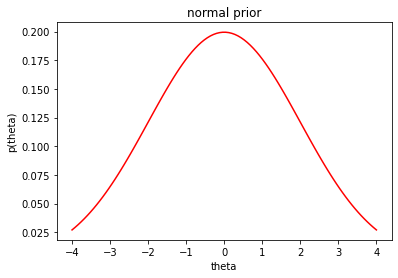

In [11]:
# choose your belief parameter
mu_0 = 0; sigma_0= 2
phi_0 = 1/4
prior = norm( mu_0 , sigma_0)
theta = np.linspace(-4,4,100)
plt.plot(theta,prior.pdf(theta), color='r')
plt.title('normal prior')
plt.xlabel('theta')
plt.ylabel('p(theta)')


Text(0, 0.5, 'p(Data|theta)')

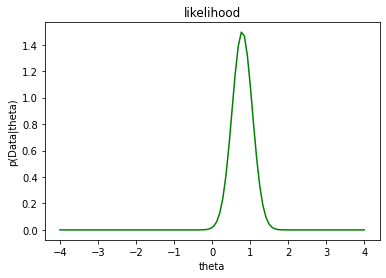

In [12]:
ybar = np.mean(data)
phi= 1/np.var(data)
sigma = np.std(data)
n=100
likelihood1 = norm(ybar,phi)
plt.plot(theta, likelihood1.pdf(theta) , color='g')
plt.title("likelihood")
plt.xlabel("theta")
plt.ylabel("p(Data|theta)")


#mu_n= (phi_0*mu_0 + n*ybar*phi) / (phi_0+n*phi)
#sd_n=  sqrt(1/(phi_0+n*phi))

Text(0.5, 1.0, 'normal posterior')

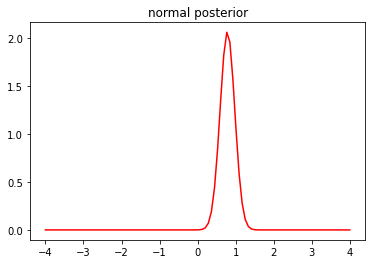

In [13]:

mu_n= (phi_0*mu_0 + n*ybar*phi) / (phi_0+n*phi)
sd_n=  np.sqrt(1/(phi_0+n*phi))
posterior = norm(loc=mu_n, scale=sd_n)
plt.plot(theta, posterior.pdf(theta),color='r')
plt.title('normal posterior')

In [14]:
print(mu_n)

0.784292648142083


Week1 HW: Polynomial Regression

In [15]:
import numpy as np 
np.set_printoptions(precision=3)
import pandas as pd 
pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [17]:
# Importing the dataset
bike = pd.read_csv('/content/drive/My Drive/ESC20-1/day.csv')
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344,0.364,0.806,0.160,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363,0.354,0.696,0.249,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196,0.189,0.437,0.248,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200,0.212,0.590,0.160,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.227,0.229,0.437,0.187,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254,0.227,0.653,0.350,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253,0.255,0.590,0.155,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253,0.242,0.753,0.124,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.256,0.232,0.483,0.351,364,1432,1796


In [18]:
bike.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [19]:
Data = bike[['cnt', 'temp']]
Data.describe()

,cnt,temp
count,731.000,731.000
mean,4504.349,0.495
std,1937.211,0.183
min,22.000,0.059
25%,3152.000,0.337
50%,4548.000,0.498
75%,5956.000,0.655
max,8714.000,0.862


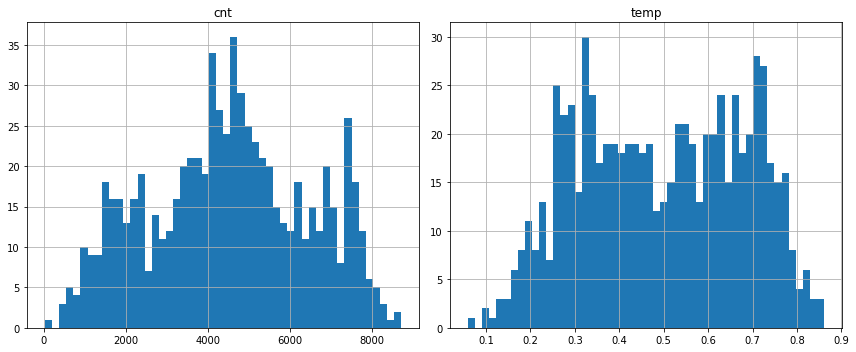

In [20]:
Data.hist(bins=50, figsize=(12, 5))
plt.tight_layout()

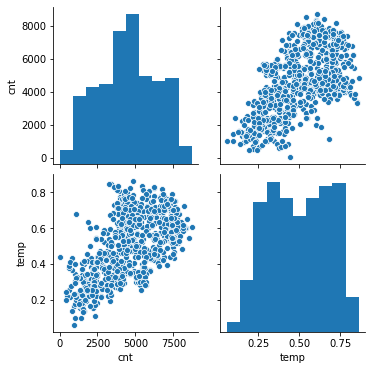

In [21]:
sns.pairplot(Data)

Polynomial Regression

In [0]:
data = Data.sample(n=30).reset_index()

1) Train-Test Split

In [23]:
N= data.shape[0]
test = np.random.choice(np.arange(N),20, replace=False)
train_df = data[~data.index.isin(test)].copy()
test_df = data[data.index.isin(test)].copy()
print(train_df.shape, test_df.shape)

(10, 3) (20, 3)


In [0]:
y = np.matrix(data['cnt']).T
X = np.matrix(data['temp']).T
y_train = np.matrix(train_df['cnt']).T
X_train = np.matrix(train_df['temp']).T
y_test = np.matrix(test_df['cnt']).T
X_test = np.matrix(test_df['temp']).T

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [26]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly.shape

(10, 3)

In [27]:
lin2 = LinearRegression(fit_intercept=False)
lin2.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [28]:
lin2.coef_

array([[ -6173.166,  44586.98 , -38073.796]])

In [0]:
from sklearn.metrics import mean_squared_error

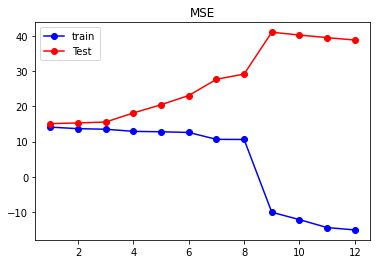

In [36]:
train_MSE = np.linspace(0,0,12)
test_MSE = np.linspace(0,0,12)
for i in range(1, 13):
    poly = PolynomialFeatures(degree=i) 
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    lin = LinearRegression(fit_intercept=False) 
    lin.fit(X_train_poly, y_train)
    y_pred_train = lin.predict(X_train_poly)
    y_pred_test =  lin.predict(X_test_poly)
    train_MSE[i-1] = np.log(mean_squared_error(y_train, y_pred_train)) 
    test_MSE[i-1] = np.log(mean_squared_error(y_test,y_pred_test))

plt.plot(range(1, 13),trainMSE, 'o-', color='blue', label = 'train')
plt.plot(range(1, 13),testMSE, 'o-' ,color='red', label = 'Test')
plt.title('MSE')
plt.legend()